# Análise Exploratória de dados

## 1. Entender o problema

- Problema:   
Encontrei um pinguim e não sei qual espécie ele é ou de qual ilha ele vem. Preciso ajudar o pinguim


- Objetivo de resolver o problema:  
Descobrir qual a espécie desse pinguim

- Estratégia:  
Usar uma base de dados para encontrar um padrão e predizer qual sua espécie


## 2. Entender os dados

In [2]:
# Importar as bibliotecas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Carregar um dataset que está embutido dentro da biblioteca (motivo: não preciso carregar o csv)
df = sns.load_dataset('penguins')

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


- Verificar estrutura da tabela

In [6]:
# Dimensões da tabela
df.shape

(344, 7)

Isso significa que meu conjunto de dados tem 344 linhas e 7 colunas

In [7]:
# Olhar para as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Tenho 4 colunas numéricas e 3 colunas categóricas. Obs.: pode haver colunas datetime.

Temos valores nulos para 4 colunas pois temos 342 valores enquanto esperamos 344. 

A variável sex tem 333 de 344 linhas

In [10]:
# Analisando cada coluna (feature)

# - species: qualitativas nominal.
df['species'].value_counts() # tabela de frequencia

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [11]:
df['species'].value_counts(normalize=True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

In [13]:
df['species'].value_counts(normalize=True).reset_index().rename(columns={'index':'species'})

,species,species
0,Adelie,0.441860
1,Gentoo,0.360465
2,Chinstrap,0.197674


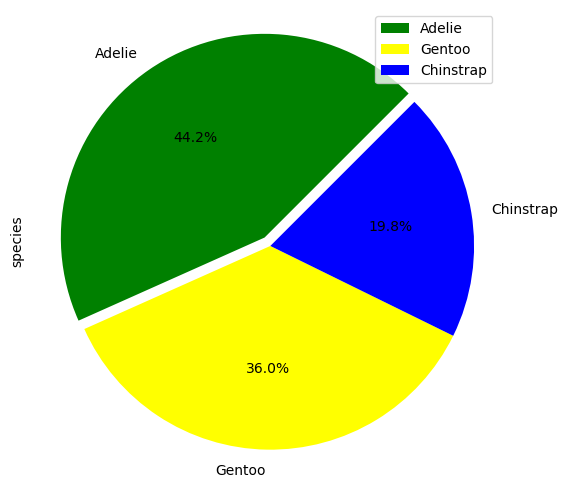

In [18]:
df['species'].value_counts(dropna=False).plot.pie(figsize=(
    6, 6), legend=True, autopct='%1.1f%%', colors=['green', 'yellow', 'blue'], explode=(0.05, 0, 0), startangle=45)
plt.axis('equal')
plt.show()

 A coluna espécies se refere a espécie do pinguim, sendo uma coluna qualitativa onde a espécie Adelie é predominante. Não tem nenhum dado faltando

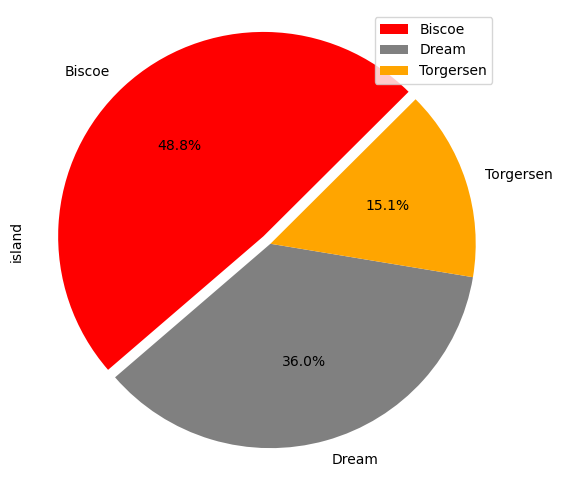

In [22]:
# - island: categória

df['island'].value_counts(dropna=False).plot.pie(figsize=(
    6, 6), legend=True, autopct='%1.1f%%', colors=['red', 'grey', 'orange'], explode=(0.05, 0, 0), startangle=45)
plt.axis('equal')
plt.show()

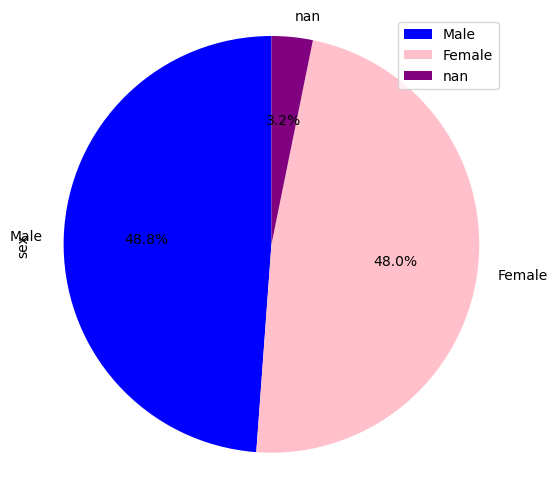

In [31]:
# - sex

# Coluna categórica que tem 11 valores faltando, que corresponde a 3,2% dos dados totais

df['sex'].value_counts(dropna=False).plot.pie(figsize=(
    6, 6), legend=True, autopct='%1.1f%%', colors=['blue', 'pink', 'purple'], explode=(0, 0, 0.0), startangle=90)
plt.axis('equal')
plt.show()

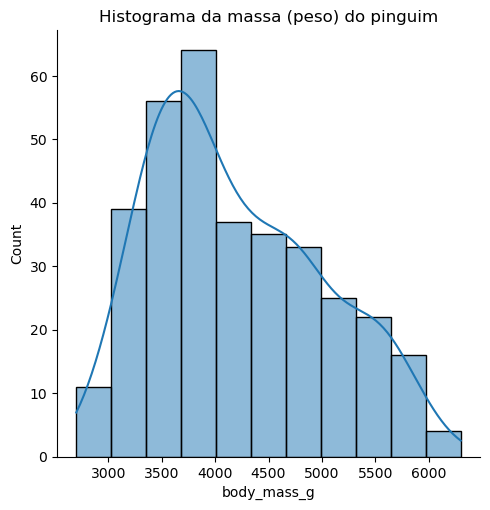

In [40]:
# - body_mass_g : coluna quantitativa (numérico) - contínuo

# df['body_mass_g'].hist() #alternativa

sns.displot(df['body_mass_g'], kde=True)
plt.title('Histograma da massa (peso) do pinguim');

Os pinguins tem peso entre 3kg a 6kg, sendo o mais comum em torno 4kg

<AxesSubplot:>

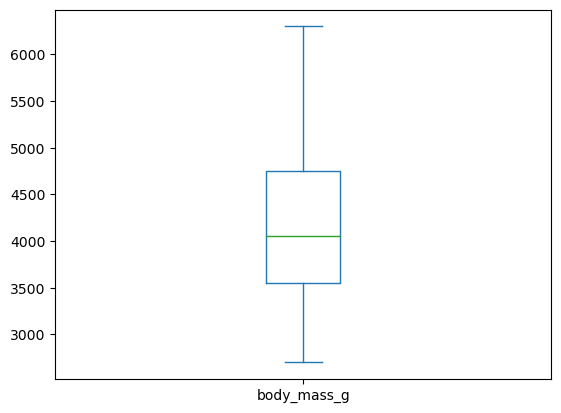

In [42]:
df['body_mass_g'].plot.box()

Qual o penguim mais gordinho?

In [43]:
df['body_mass_g'].max()

6300.0

Qual a média e mediana dos pesos dos pinguins?

In [44]:
df['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [45]:
# outras colunas

df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [46]:
# conclusões


# Dados faltantes

df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [48]:
# Porcentagem dos dados faltantes

(df.isna().sum()/len(df))*100

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [52]:
# o que fazer com os dados faltantes?

# Nesse caso vamos eliminar
df[(df['sex'].notnull()) & (df['body_mass_g'].notnull()) & (df['bill_length_mm'].notnull())
    & (df['bill_depth_mm'].notnull()) & (df['flipper_length_mm'].notnull())]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Ficamos com 333 registros

In [54]:
# Correlação (análise bivariada)

df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Correlação forte é +1 ou -1. Correlação fraca ou inexistente é 0

<AxesSubplot:>

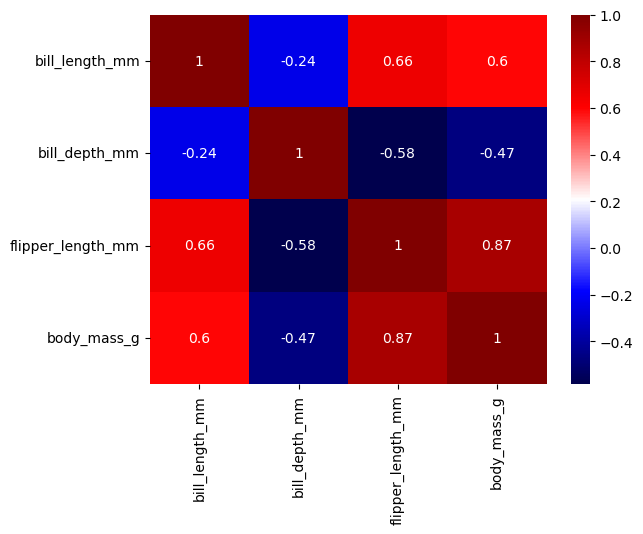

In [55]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='seismic')

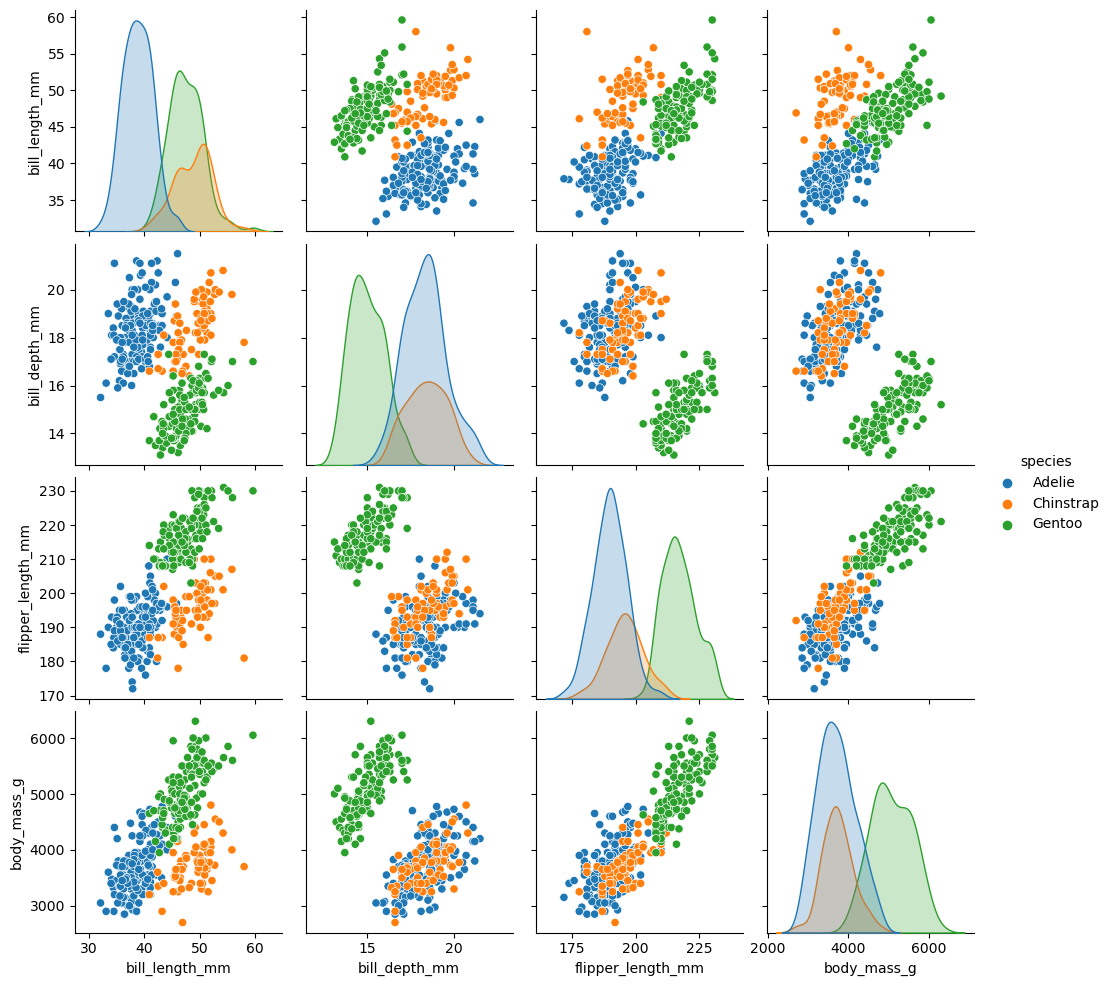

In [60]:
# plt.title('Relação entre as características dos pinguins em relação as espécies')
sns.pairplot(df, hue='species')